In [151]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from tqdm import tqdm
import re
import numpy as np 
import pandas as pd
import os
import seaborn as sns
from scipy import stats

#To display complete contents of a dataframe without any kind of truncation, we need to set these 4 options:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  from ipykernel import kernelapp as app


In [152]:
#Reading CSV and printing out first row:
os.chdir("D:\\Springboard")
df=pd.read_csv("zomato.csv")
print(df.head(1))

                                                                                                                                                                                                                                        url  \
0  https://www.zomato.com/bangalore/jalsa-banashankari?context=eyJzZSI6eyJlIjpbNTg2OTQsIjE4Mzc1NDc0IiwiNTkwOTAiLCIxODM4Mjk0NCIsIjE4MjI0Njc2IiwiNTkyODkiLCIxODM3MzM4NiJdLCJ0IjoiUmVzdGF1cmFudHMgaW4gQmFuYXNoYW5rYXJpIHNlcnZpbmcgQnVmZmV0In19   

                                                   address   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, Bangalore  Jalsa   

  online_order book_table   rate  votes                           phone  \
0  Yes          Yes        4.1/5  775    080 42297555\r\n+91 9743772233   

       location      rest_type  \
0  Banashankari  Casual Dining   

                                                                                       dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Lajawab, Tomato 

**Pick the columns we'll work with:**

*   Name
*   Address
*   Location
*   Restaurant rating
*   Review rating
*   Review

In [153]:
#Extract reviews and ratings into a DF, and list a review against Jalsa :
all_ratings = []
for name,address,location,rate,ratings in tqdm(zip(df['name'],df['address'],df['location'],df['rate'],df['reviews_list'])):
    ratings = eval(ratings)
    for score, doc in (ratings):
        if score:
            score = score.strip("Rated")#.strip()
            doc = doc.strip('RATED').strip()
            score = float(score)
            all_ratings.append([name,address,location,rate,score, doc])
rating_df=pd.DataFrame(all_ratings,columns=['name','address','location','restaurant_rating','review_rating','review'])
print(rating_df[rating_df['name']=='Jalsa'].tail(1))

51717it [00:23, 2221.08it/s]


          name  \
1022168  Jalsa   

                                                                             address  \
1022168  25/7, Doddannakundi, Outer Ring Road, Mahadevapura, Marathahalli, Bangalore   

             location restaurant_rating  review_rating  \
1022168  Marathahalli  4.2 /5            5.0             

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      review  
1022168  Nice place for lunch ÃÃÃÃÃÃÃÃÂ°ÃÃÃÃÃÃÃÃÃÃÃÃÃÃÃÃÃÃÃÃÃÃÃÃ

Taking a closer look at the last review, we notice junk characters. Now, we remove anything that is not a letter or a number:

In [154]:
rating_df['review']=rating_df['review'].apply(lambda x : re.sub('[^a-zA-Z0-9\s]',"",x))   
#regex = r'\W+(?!\S*[a-z])|(?<!\S)\W+'
#rating_df['review']=rating_df['review'].apply(lambda x : re.sub(regex, '', x, 0, re.IGNORECASE))   
#fix to retain punctuation and @, remove \n
print(rating_df.loc[1022168]['review'])  #retains dots and special characters?

Nice place for lunch  with office team The ambiance was really good Its a well balanced combination of royals  and feeling like we dine in our own kingdom

Food was good
Service was pretty nice Overall experience was good


subirmajumder85wixsitecom


In [155]:
#Checking for uniqueness of restaurant entries in the dataset:

In [156]:
print(rating_df[rating_df['name']=='Jalsa'].index.values)

[      0       1       2       3       4       5       6       7       8
       9      10      11    9027    9028    9029    9030    9031    9032
    9033    9034    9035    9036    9037   10866   10867   10868   10869
   10870   10871   10872   10873   10874   10875   10876   46108   46109
   46110   46111   46112   46113   46114   46115   46116   46117   55999
   56000   56001   56002   56003   56004   56005   56006   56007   56008
   62938   62939   62940   62941   62942   62943   62944   62945   62946
   62947  157372  157373  157374  157375  157376  157377  157378  157379
  157380  157381  157382  157383  157384  157385  157386  157387  157388
  157389  157390  157391  157392  157393  157394  157395  157396  157397
  157398  157399  157400  157401  157402  157403  157404  157405  157406
  157407  157408  157409  157410  157411  157412  157413  157414  157415
  157416  157417  157418  157419  157420  427965  427966  427967  427968
  427969  427970  427971  427972  457500  457501  4

The index numbers above range from 0-11 and then abruptly jumps to 9027. This indicates that there are multiple entries in the dataset for 'Jalsa', which in our case could map to different chains of the restaurant across multiple locations.

In [157]:
#Checking original dataset
print("Listing Jalsa restaurants :\n",df[df['name']=='Jalsa'][['location','address']])

print("\n\n\nListing unique addresses for the restaurant per location : \n",df[df['name']=='Jalsa'].groupby('address')['location'].unique())

Listing Jalsa restaurants :
            location  \
0      Banashankari   
456    Banashankari   
559    Banashankari   
2488   Banashankari   
2966   Banashankari   
3462   Banashankari   
7607   Marathahalli   
19401  Banashankari   
20399  Banashankari   
21302  Banashankari   
41364  Marathahalli   

                                                                           address  
0      942, 21st Main Road, 2nd Stage, Banashankari, Bangalore                      
456    942, 21st Main Road, 2nd Stage, Banashankari, Bangalore                      
559    942, 21st Main Road, 2nd Stage, Banashankari, Bangalore                      
2488   942, 21st Main Road, 2nd Stage, Banashankari, Bangalore                      
2966   942, 21st Main Road, 2nd Stage, Banashankari, Bangalore                      
3462   942, 21st Main Road, 2nd Stage, Banashankari, Bangalore                      
7607   25/7, Doddannakundi, Outer Ring Road, Mahadevapura, Marathahalli, Bangalore  
19401  942, 21

There are 2 unique addresses with multiple entries in the dataset. But, it maps one address to one location. 

In [158]:
print(df.loc[0]['url'])
print(df.loc[456]['url'])
display(df[(df['name']=='Jalsa') & (df['location']=='Banashankari') ].groupby('address')['url'].unique())

https://www.zomato.com/bangalore/jalsa-banashankari?context=eyJzZSI6eyJlIjpbNTg2OTQsIjE4Mzc1NDc0IiwiNTkwOTAiLCIxODM4Mjk0NCIsIjE4MjI0Njc2IiwiNTkyODkiLCIxODM3MzM4NiJdLCJ0IjoiUmVzdGF1cmFudHMgaW4gQmFuYXNoYW5rYXJpIHNlcnZpbmcgQnVmZmV0In19
https://www.zomato.com/bangalore/jalsa-banashankari?context=eyJzZSI6eyJlIjpbIjE4ODkwOTQwIiwiMTg4ODYyNzgiLCIxODg4NzM5MCIsIjE4OTAwNDI2Iiw1ODY5NCwiNTE4MTUiLCIxODcyOTM5MiIsIjE4OTQ2MjE0IiwiMTg3MTYwNjEiLCIxODYxNDQ3NiIsIjE4NzkzMDEwIiwiMTg5MjI5MTMiLCI1NjU5MCIsIjYwMjI0IiwiMTg2MzgzMzAiLCIxODg3NDI5MiIsIjE4NjM1MTMzIiwiNTQ4MDgiLCIxODUxMTYzNSIsIjE4Njk0OTU0IiwiMTg4ODE3NjYiLCIxODQzOTY3MCIsIjU5MDkwIiwiNTk4NTAiXSwidCI6IkRlbGl2ZXJ5IFJlc3RhdXJhbnRzIGluIEJhbmFzaGFua2FyaSJ9fQ==


address
942, 21st Main Road, 2nd Stage, Banashankari, Bangalore    [https://www.zomato.com/bangalore/jalsa-banashankari?context=eyJzZSI6eyJlIjpbNTg2OTQsIjE4Mzc1NDc0IiwiNTkwOTAiLCIxODM4Mjk0NCIsIjE4MjI0Njc2IiwiNTkyODkiLCIxODM3MzM4NiJdLCJ0IjoiUmVzdGF1cmFudHMgaW4gQmFuYXNoYW5rYXJpIHNlcnZpbmcgQnVmZmV0In19, https://www.zomato.com/bangalore/jalsa-banashankari?context=eyJzZSI6eyJlIjpbIjE4ODkwOTQwIiwiMTg4ODYyNzgiLCIxODg4NzM5MCIsIjE4OTAwNDI2Iiw1ODY5NCwiNTE4MTUiLCIxODcyOTM5MiIsIjE4OTQ2MjE0IiwiMTg3MTYwNjEiLCIxODYxNDQ3NiIsIjE4NzkzMDEwIiwiMTg5MjI5MTMiLCI1NjU5MCIsIjYwMjI0IiwiMTg2MzgzMzAiLCIxODg3NDI5MiIsIjE4NjM1MTMzIiwiNTQ4MDgiLCIxODUxMTYzNSIsIjE4Njk0OTU0IiwiMTg4ODE3NjYiLCIxODQzOTY3MCIsIjU5MDkwIiwiNTk4NTAiXSwidCI6IkRlbGl2ZXJ5IFJlc3RhdXJhbnRzIGluIEJhbmFzaGFua2FyaSJ9fQ==, https://www.zomato.com/bangalore/jalsa-banashankari?context=eyJzZSI6eyJlIjpbIjUyMjczIiwiNTg2NDQiLCIxODU2NTY3OSIsIjE4NjY3NTY3Iiw1ODY5NCwiNjAyMjQiLCI1MDUxNiIsIjU5NTIxIiwiMTg1OTMwNDQiLCIxODM3NTQ3NCIsIjE4MTQ4OTQxIiwiMTg0NzA3NzEiLCIxODcxNjA2

It could be that there are multiple branches in the same locality, but we see that the addrsses are the same for each location. Moreover, both these URLs redirect to the same page. So, we tag the restaurants together by name and address to maintain uniqueness for each branch:

In [159]:
rating_df['Tag']=rating_df['name']+'-'+rating_df['address']
print(rating_df.head(1))

    name                                                  address  \
0  Jalsa  942, 21st Main Road, 2nd Stage, Banashankari, Bangalore   

       location restaurant_rating  review_rating  \
0  Banashankari  4.1/5             4.0             

                                                                                                                                                                                                                                                                                                                                                 review  \
0  A beautiful place to dine inThe interiors take you back to the Mughal era The lightings are just perfectWe went there on the occasion of Christmas and so they had only limited items available But the taste and service was not compromised at allThe only complaint is that the breads could have been betterWould surely like to come here again   

                                                             

In [160]:
#Checking ratings columns:

In [161]:
print("Review Rating :\n",rating_df['review_rating'].unique())
print("Restaurant Rating :\n",rating_df['restaurant_rating'].unique())

Review Rating :
 [4.  2.  5.  3.  1.  3.5 1.5 4.5 2.5]
Restaurant Rating :
 ['4.1/5' '3.8/5' '3.7/5' '3.6/5' '4.6/5' '4.0/5' '4.2/5' '3.9/5' '3.1/5'
 '3.0/5' '3.2/5' '3.3/5' '2.8/5' '4.4/5' '4.3/5' 'NEW' '2.9/5' '3.5/5' nan
 '2.6/5' '3.8 /5' '3.4/5' '4.5/5' '2.5/5' '2.7/5' '4.7/5' '2.4/5' '2.2/5'
 '2.3/5' '3.4 /5' '-' '3.6 /5' '4.8/5' '3.9 /5' '4.2 /5' '4.0 /5' '4.1 /5'
 '3.7 /5' '2.9 /5' '3.3 /5' '2.8 /5' '3.5 /5' '2.7 /5' '3.2 /5' '3.1 /5'
 '2.6 /5' '4.5 /5' '4.3 /5' '4.4 /5' '4.9/5' '2.1/5' '2.0/5' '1.8/5'
 '4.6 /5' '4.9 /5' '2.5 /5' '3.0 /5' '4.8 /5' '2.3 /5' '4.7 /5' '2.4 /5'
 '2.1 /5' '2.2 /5' '2.0 /5' '1.8 /5']


In [162]:
#We remove restaurants that havent been reviewed ('NEW'):
rating_df.drop((rating_df[rating_df['restaurant_rating']=='NEW']).index, inplace = True)

In [163]:
#We remove restaurants thatdont have a rating('-') or have null values from rating:
rating_df.drop((rating_df[rating_df['restaurant_rating']=='-']).index, inplace = True)
rating_df.drop((rating_df[rating_df['restaurant_rating'].isnull()]).index, inplace = True)
print(rating_df['restaurant_rating'].unique())

['4.1/5' '3.8/5' '3.7/5' '3.6/5' '4.6/5' '4.0/5' '4.2/5' '3.9/5' '3.1/5'
 '3.0/5' '3.2/5' '3.3/5' '2.8/5' '4.4/5' '4.3/5' '2.9/5' '3.5/5' '2.6/5'
 '3.8 /5' '3.4/5' '4.5/5' '2.5/5' '2.7/5' '4.7/5' '2.4/5' '2.2/5' '2.3/5'
 '3.4 /5' '3.6 /5' '4.8/5' '3.9 /5' '4.2 /5' '4.0 /5' '4.1 /5' '3.7 /5'
 '2.9 /5' '3.3 /5' '2.8 /5' '3.5 /5' '2.7 /5' '3.2 /5' '3.1 /5' '2.6 /5'
 '4.5 /5' '4.3 /5' '4.4 /5' '4.9/5' '2.1/5' '2.0/5' '1.8/5' '4.6 /5'
 '4.9 /5' '2.5 /5' '3.0 /5' '4.8 /5' '2.3 /5' '4.7 /5' '2.4 /5' '2.1 /5'
 '2.2 /5' '2.0 /5' '1.8 /5']


In [164]:
#Removing '/5' and ' /5'
rating_df['restaurant_rating']=rating_df['restaurant_rating'].map(lambda x: x.replace('/5', ''))
rating_df['restaurant_rating']=rating_df['restaurant_rating'].map(lambda x: x.replace(' ', ''))
print(rating_df['restaurant_rating'].unique())

['4.1' '3.8' '3.7' '3.6' '4.6' '4.0' '4.2' '3.9' '3.1' '3.0' '3.2' '3.3'
 '2.8' '4.4' '4.3' '2.9' '3.5' '2.6' '3.4' '4.5' '2.5' '2.7' '4.7' '2.4'
 '2.2' '2.3' '4.8' '4.9' '2.1' '2.0' '1.8']


In [165]:
print("Review Rating :\n",rating_df['review_rating'].unique())
print("Restaurant Rating :\n",rating_df['restaurant_rating'].unique())

Review Rating :
 [4.  2.  5.  3.  1.  3.5 1.5 4.5 2.5]
Restaurant Rating :
 ['4.1' '3.8' '3.7' '3.6' '4.6' '4.0' '4.2' '3.9' '3.1' '3.0' '3.2' '3.3'
 '2.8' '4.4' '4.3' '2.9' '3.5' '2.6' '3.4' '4.5' '2.5' '2.7' '4.7' '2.4'
 '2.2' '2.3' '4.8' '4.9' '2.1' '2.0' '1.8']


In [166]:
#No NaN or values to remove here.

In [167]:
#We need ratings to be numeric:
print(rating_df.dtypes)
rating_df['review_rating']=pd.to_numeric(rating_df['review_rating'])
rating_df['restaurant_rating']=pd.to_numeric(rating_df['restaurant_rating'])
print(rating_df.dtypes)

name                 object 
address              object 
location             object 
restaurant_rating    object 
review_rating        float64
review               object 
Tag                  object 
dtype: object
name                 object 
address              object 
location             object 
restaurant_rating    float64
review_rating        float64
review               object 
Tag                  object 
dtype: object


In [168]:
#Checking unique Restaurant Ratings for each restaurant branch to see if there are erroneous entries:
print(rating_df[rating_df['Tag'].str.startswith('Jalsa-', na=False)].groupby('Tag')['restaurant_rating'].unique())

Tag
Jalsa-25/7, Doddannakundi, Outer Ring Road, Mahadevapura, Marathahalli, Bangalore    [4.2]
Jalsa-942, 21st Main Road, 2nd Stage, Banashankari, Bangalore                        [4.1]
Name: restaurant_rating, dtype: object


We see that there are only 2 restaurant branches, with 1 unique restaurant rating each. 

Checking restaurant indexes for first branch.

NormaltestResult(statistic=129382.44642459248, pvalue=0.0)
NormaltestResult(statistic=94191.88479967015, pvalue=0.0)


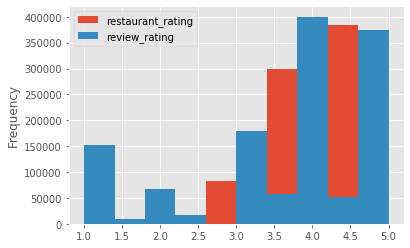

In [169]:
#Plotting Restaurant Review-Rating Distribution & Restaurant-Rating Distribution

ax = rating_df.plot.hist()
#ax = rating_df['review_rating'].plot.hist()

print(stats.normaltest(rating_df['review_rating']))
print(stats.normaltest(rating_df['restaurant_rating']))


#print("review_rating :\n",rating_df['review_rating'].value_counts())
#print("restaurant_rating :\n",rating_df['restaurant_rating'].value_counts())

In [170]:
#Since the p-values is 0 for both tests, our conclusion is that the data are not normally distributed which we see in the histograms above.

In [171]:
rating_df.corr()

,restaurant_rating,review_rating
restaurant_rating,1.000000,0.375489
review_rating,0.375489,1.000000


In [ ]:
#The two ratings columns have no correlation as seen above.

In [173]:
#!pip install textblob
#from textblob import TextBlob
#rating_df['polarity'] = rating_df['review'].apply(lambda x: TextBlob(x).sentiment[0])
#print(rating_df['review_rating'][0],TextBlob(rating_df['review'][0]).sentiment, rating_df['review'][0])

In [174]:
#for i in range(0,5):
#    print(TextBlob(rating_df['review'][i]).sentiment)
